In [26]:
import numpy as np
import pandas as pd
import glob 
import csv
import traceback
import datetime
import os
import seaborn
pd.options.display.max_columns=50

In [27]:
results = glob.glob('../results/performances/fld6-result-*')   # fld6: DATE/enhanced_bATE, fld8: xgb/random
list1, list2 = zip(*sorted(zip([os.stat(result).st_size for result in results], results)))

### Collecting Result Files: Results of Individual Experiments

In [28]:
# Retrieving results
num_logs = len([i for i in list1 if i > 1000])
count= 0
summary = []
for i in range(1,num_logs+1):
    rslt = pd.read_csv(list2[-i])
    dic = rslt[['runID','data','sampling','subsamplings','numWeek','current_inspection_rate','test_start','test_end']].iloc[len(rslt)-1].to_dict()
    run_id = round(dic['runID'], 3)
    data = dic['data']
    subsamplings = dic['subsamplings'].replace('/','+')
    strategy = dic['sampling']
    cir = dic['current_inspection_rate']
    summary.append(dic)
summary = pd.DataFrame(summary)

In [29]:
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

full_results = defaultdict(list)

# Retrieving results
num_logs = len([i for i in list1 if i > 1000])
count= 0
for i in range(1,num_logs+1):
    try:
        df = pd.read_csv(list2[-i])
        var = 'norm-revenue'
        rolling_mean7 = df[var].rolling(window=7).mean()
        rolling_mean14 = df[var].rolling(window=13).mean()
        filename = list2[-i][list2[-i].index('16'):list2[-i].index('16')+10]
        info = ','.join(list(df[['data', 'subsamplings','weights']].iloc[0]))
        full_results[info].append(rolling_mean14)
        count += 1
        
    except:
        print('loading error:', list2[-i])
        continue
print(count)
#     plt.close()

88


In [30]:
summary

,runID,data,sampling,subsamplings,numWeek,current_inspection_rate,test_start,test_end
0,1.603142e+09,real-n,hybrid,xgb/random,244,10.0,17-09-29,17-10-06
1,1.603142e+09,real-n,xgb,-,243,10.0,17-09-22,17-09-29
2,1.602997e+09,real-t,hybrid,DATE/enhanced_bATE,193,10.0,18-10-07,18-10-14
3,1.602997e+09,real-t,hybrid,DATE/enhanced_bATE,191,10.0,18-09-23,18-09-30
4,1.602999e+09,real-t,hybrid,DATE/enhanced_bATE,190,10.0,18-09-16,18-09-23
...,...,...,...,...,...,...,...,...
83,1.603114e+09,real-n,hybrid,DATE/enhanced_bATE,38,10.0,15-10-18,15-10-25
84,1.603114e+09,real-n,hybrid,DATE/enhanced_bATE,34,10.0,15-09-20,15-09-27
85,1.603114e+09,real-n,hybrid,DATE/enhanced_bATE,33,10.0,15-09-13,15-09-20
86,1.603116e+09,real-n,hybrid,DATE/enhanced_bATE,13,10.0,15-04-26,15-05-03


### Exploitation-exploration results by changing weights (Tunisia, DATE+enhanced_DATE)

Weight between Exploitation and Exploration:
real-t,DATE/enhanced_bATE,0.99/0.01 0.2609
real-t,DATE/enhanced_bATE,0.98/0.02 0.2828
real-t,DATE/enhanced_bATE,0.95/0.05 0.3904
real-t,DATE/enhanced_bATE,0.9/0.1 0.458
real-t,DATE/enhanced_bATE,0.8/0.2 0.5005
real-t,DATE/enhanced_bATE,0.7/0.3 0.5171
real-t,DATE/enhanced_bATE,0.6/0.4 0.5009
real-t,DATE/enhanced_bATE,0.5/0.5 0.5097
real-t,DATE/enhanced_bATE,0.4/0.6 0.479
real-t,DATE/enhanced_bATE,0.3/0.7 0.439
real-t,DATE/enhanced_bATE,0.2/0.8 0.4236
real-t,DATE/enhanced_bATE,0.1/0.9 0.3776
real-t,DATE/enhanced_bATE,0.05/0.95 0.3378
real-t,DATE/enhanced_bATE,0.02/0.98 0.3092
real-t,DATE/enhanced_bATE,0.01/0.99 0.2857


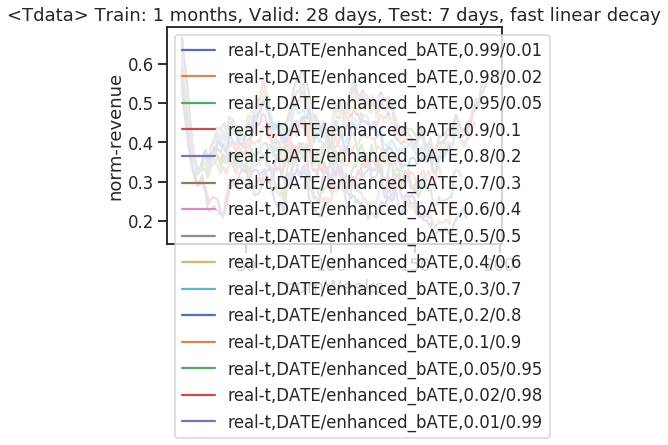

<Figure size 432x288 with 0 Axes>

In [31]:
plt.figure()
dd = {}
subsampling='DATE/enhanced_bATE'

result_one_dataset = [key for key in full_results.keys()]
print('Weight between Exploitation and Exploration:')
for key in ['real-t,'+subsampling+',0.99/0.01', 'real-t,'+subsampling+',0.98/0.02', 'real-t,'+subsampling+',0.95/0.05', 'real-t,'+subsampling+',0.9/0.1', 'real-t,'+subsampling+',0.8/0.2','real-t,'+subsampling+',0.7/0.3','real-t,'+subsampling+',0.6/0.4','real-t,'+subsampling+',0.5/0.5','real-t,'+subsampling+',0.4/0.6','real-t,'+subsampling+',0.3/0.7','real-t,'+subsampling+',0.2/0.8','real-t,'+subsampling+',0.1/0.9','real-t,'+subsampling+',0.05/0.95','real-t,'+subsampling+',0.02/0.98','real-t,'+subsampling+',0.01/0.99']:            # result_one_dataset:
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
#     print(pd.concat([*full_results[key]], axis=1))   # Check current running status: debug purpose

    week = min(summary[(summary.data == 'real-t') & (summary.subsamplings == subsampling)]['numWeek'])
    week = 120
    print(key, round(np.mean(avg_result[week-13:week]), 4))
    explore = key[key.index('/')+1:]
    explore = explore[explore.index('/')+1:]
    dd[explore] = round(np.mean(avg_result[week-13:week]), 4)
    plt.plot(avg_result.index, avg_result, label=key)

# # printing test_illicit_rate
# tir = pd.read_csv(list2[-1])['test_illicit_rate'].rolling(window=7).mean()
# plt.plot(tir.index, tir, label='Test illicit rate (ref)')

plt.title('<Tdata> Train: 1 months, Valid: 28 days, Test: 7 days, fast linear decay')
plt.legend(loc='upper left')
plt.ylabel(var)
plt.xlabel('numWeeks')
# plt.ylim(0.4, 0.6)
plt.show()
plt.close()
plt.savefig("exploitation-exploration-ratio-trends.pdf", bbox_inches='tight')

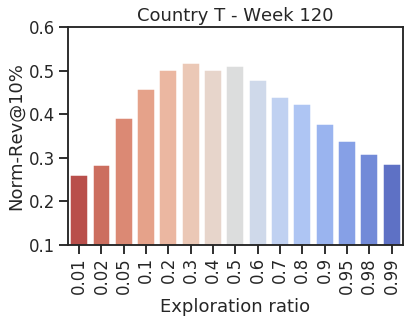

In [32]:
keys = dd.keys()
values = dd.values()
%matplotlib inline

seaborn.set(style="ticks", context="talk")
(f, ax) = plt.subplots(1)

b = seaborn.barplot(
    list(keys), 
    list(values),
    ci=None, 
    palette='coolwarm_r')
b.set_xticklabels(list(keys), rotation=90)
plt.xlabel('Exploration ratio')
plt.ylabel('Norm-Rev@10%')
plt.title('Country T - Week 120')
plt.ylim(0.1, 0.6)
f.savefig("exploitation-exploration-ratio-t-DATE-gATE-week120.pdf", bbox_inches='tight')

### Malawi (XGB+random)

In [19]:
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

full_results = defaultdict(list)

# Retrieving results
num_logs = len([i for i in list1 if i > 1000])
count= 0
for i in range(1,num_logs+1):
    try:
        df = pd.read_csv(list2[-i])
        var = 'norm-revenue'
        rolling_mean7 = df[var].rolling(window=7).mean()
        rolling_mean14 = df[var].rolling(window=13).mean()
        filename = list2[-i][list2[-i].index('16'):list2[-i].index('16')+10]
        info = ','.join(list(df[['data', 'subsamplings','weights']].iloc[0]))
        full_results[info].append(rolling_mean14)
        count += 1
    except:
        print('loading error:', list2[-i])
        continue
print(count)
#     plt.close()

88


In [20]:
# Retrieving results
num_logs = len([i for i in list1 if i > 3000])
count= 0
summary = []
for i in range(1,num_logs+1):
    rslt = pd.read_csv(list2[-i])
    dic = rslt[['runID','data','sampling','subsamplings','numWeek','current_inspection_rate','test_start','test_end']].iloc[len(rslt)-1].to_dict()
    run_id = round(dic['runID'], 3)
    data = dic['data']
    subsamplings = dic['subsamplings'].replace('/','+')
    strategy = dic['sampling']
    cir = dic['current_inspection_rate']
    summary.append(dic)
summary = pd.DataFrame(summary)

Weight between Exploitation and Exploration:
real-m,xgb/random,0.99/0.01 0.9373
real-m,xgb/random,0.98/0.02 0.9148
real-m,xgb/random,0.95/0.05 0.8502
real-m,xgb/random,0.9/0.1 0.859
real-m,xgb/random,0.8/0.2 0.7645
real-m,xgb/random,0.7/0.3 0.4989
real-m,xgb/random,0.6/0.4 0.4708
real-m,xgb/random,0.5/0.5 0.4254
real-m,xgb/random,0.4/0.6 0.4017
real-m,xgb/random,0.3/0.7 0.3199
real-m,xgb/random,0.2/0.8 0.2558
real-m,xgb/random,0.1/0.9 0.1418
real-m,xgb/random,0.05/0.95 0.0907
real-m,xgb/random,0.02/0.98 0.0892
real-m,xgb/random,0.01/0.99 0.122


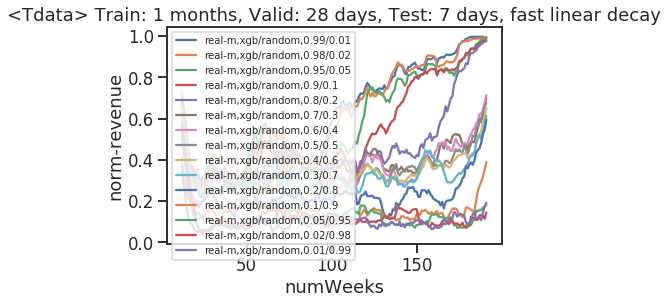

<Figure size 432x288 with 0 Axes>

In [23]:
plt.figure()
dd = {}
# info = ','.join(list(df[['data', 'samplings']].iloc[0]))
subsampling='xgb/random'

result_one_dataset = [key for key in full_results.keys()]
print('Weight between Exploitation and Exploration:')

for key in ['real-m,'+subsampling+',0.99/0.01', 'real-m,'+subsampling+',0.98/0.02', 'real-m,'+subsampling+',0.95/0.05', 'real-m,'+subsampling+',0.9/0.1', 'real-m,'+subsampling+',0.8/0.2','real-m,'+subsampling+',0.7/0.3','real-m,'+subsampling+',0.6/0.4','real-m,'+subsampling+',0.5/0.5','real-m,'+subsampling+',0.4/0.6','real-m,'+subsampling+',0.3/0.7','real-m,'+subsampling+',0.2/0.8','real-m,'+subsampling+',0.1/0.9','real-m,'+subsampling+',0.05/0.95','real-m,'+subsampling+',0.02/0.98','real-m,'+subsampling+',0.01/0.99']:            # result_one_dataset:
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
#     print(pd.concat([*full_results[key]], axis=1))   # Check current running status: debug purpose

    week = min(summary[summary.data == 'real-m']['numWeek'])
    week = 180
    print(key, round(np.mean(avg_result[week-13:week]), 4))
    explore = key[key.index('/')+1:]
    explore = explore[explore.index('/')+1:]
    dd[explore] = round(np.mean(avg_result[week-13:week]), 4)
    plt.plot(avg_result.index, avg_result, label=key)

# # printing test_illicit_rate
# tir = pd.read_csv(list2[-1])['test_illicit_rate'].rolling(window=7).mean()
# plt.plot(tir.index, tir, label='Test illicit rate (ref)')

plt.title('<Tdata> Train: 1 months, Valid: 28 days, Test: 7 days, fast linear decay')
plt.legend(loc='upper left', fontsize=10)
plt.ylabel(var)
plt.xlabel('numWeeks')
# plt.ylim(0.4, 0.6)
plt.show()
plt.close()
plt.savefig("exploitation-exploration-ratio-trends.pdf", bbox_inches='tight')

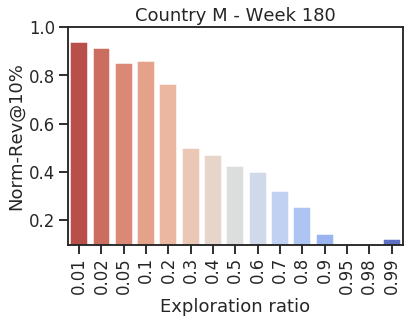

In [25]:
keys = dd.keys()
values = dd.values()
%matplotlib inline

seaborn.set(style="ticks", context="talk")
(f, ax) = plt.subplots(1)

b = seaborn.barplot(
    list(keys), 
    list(values),
    ci=None, 
    palette='coolwarm_r')
b.set_xticklabels(list(keys), rotation=90)
plt.xlabel('Exploration ratio')
plt.ylabel('Norm-Rev@10%')
plt.title('Country M - Week 180')
plt.ylim(0.1, 1)
f.savefig("exploitation-exploration-ratio-m-xgb-random-week180.pdf", bbox_inches='tight')